In [117]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import sklearn.datasets as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve
import scipy.spatial.distance as ssp
import pickle

In [118]:
pickle_file = "./A51597_Ficha2_Respostas.p"

with open(pickle_file, 'rb') as file:
    respostas: dict = pickle.loads(file.read())

print(respostas.keys())
print(respostas['Q001'])
print(respostas['Q002'])
print(respostas['nome'])
print(respostas['numero'])

dict_keys(['Q001', 'Q002', 'nome', 'numero'])
[[-1. -1. -1. -1.]
 [-1. -1. -1. -1.]]
[[-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]]
Rui Manuel Branco Cardoso Rodrigues Ferreira
A51597


In [119]:
data_file = "./A51597_Q001_data.p"

with open(data_file, 'rb') as file:
    dataset: dict = pickle.loads(file.read())

print(dataset.keys())

dict_keys(['trueClass', 'estClass'])


In [120]:
pred = np.array(dataset.get('estClass'))
target = np.array(dataset.get('trueClass'))

In [121]:
report = classification_report(target, pred, digits=3)

print(report)

              precision    recall  f1-score   support

         0.0      0.951     0.895     0.922      1170
         1.0      0.824     0.914     0.867       630

    accuracy                          0.902      1800
   macro avg      0.887     0.905     0.894      1800
weighted avg      0.907     0.902     0.903      1800



In [122]:
respostas['Q001'][0] = [0, 1, 0, 0]

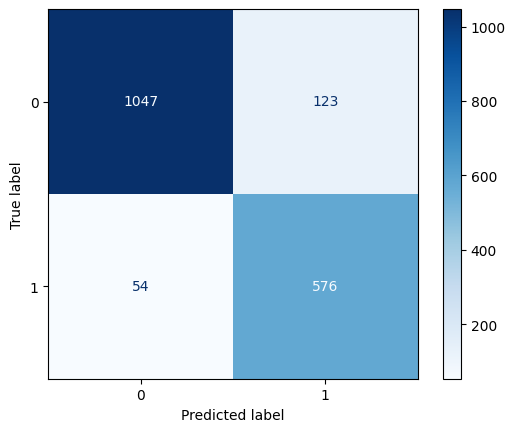

In [123]:
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(target, pred)

display = ConfusionMatrixDisplay(cm)
display.plot(cmap="Blues")

In [124]:
print(np.round(1047/(1047+123) * 100, 1))
print(np.round(576/(576+54) * 100, 1))

89.5
91.4


In [125]:
respostas['Q001'][1] = [1, 0, 0, 0]

In [126]:
respostas['Q001']

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.]])

# 2.

In [127]:
X = np.array([[0, 0, -4 , -3, 4, 3, 6, 4, 4], [4, 5, 1, 1, 2, 2, 4, 3, 3]])

In [128]:
Xw0 = X[:, :4]
Xw1 = X[:, 5:]
print(Xw0)
print(Xw1)
print(Xw0.shape)
print(Xw1.shape)

v = np.array([3, -1])

print("w0 =", np.mean(ssp.cdist(v[np.newaxis], Xw0.T, metric='mahalanobis')))
print("w1 =",np.mean(ssp.cdist(v[np.newaxis], Xw1.T, metric='mahalanobis')))

print("-----------------------")

v = np.array([2, 1])

print("w0 =", np.mean(ssp.cdist(v[np.newaxis], Xw0.T, metric='mahalanobis')))
print("w1 =",np.mean(ssp.cdist(v[np.newaxis], Xw1.T, metric='mahalanobis')))

[[ 0  0 -4 -3]
 [ 4  5  1  1]]
[[3 6 4 4]
 [2 4 3 3]]
(2, 4)
(2, 4)
w0 = 2.4291472461356847
w1 = 2.433897324240702
-----------------------
w0 = 2.4049964410159985
w1 = 2.181756585352055


In [129]:
respostas['Q002'][0] = [0, 1, 0, 0]

In [130]:
c0 = np.mean(Xw0.T, axis=0)
print(c0)

c1 = np.mean(Xw1.T, axis=0)
print(c1)

v = Xw0

print(ssp.cdist(v.T, c0[np.newaxis], metric='cosine'))
print('------------------------')
print(ssp.cdist(v.T, c1[np.newaxis], metric='cosine'))

print('.------------------.')

v = Xw1

print(ssp.cdist(v.T, c0[np.newaxis], metric='cosine'))
print('------------------------')
print(ssp.cdist(v.T, c1[np.newaxis], metric='cosine'))

# v = Xw0.T[0]
# print(ssp.cdist(v[np.newaxis], c0[np.newaxis], metric='cosine'))
# print(ssp.cdist(v[np.newaxis], c1[np.newaxis], metric='cosine'))
# print('w0' if ssp.cdist(v[np.newaxis], c0[np.newaxis], metric='cosine') < ssp.cdist(v[np.newaxis], c1[np.newaxis], metric='cosine') else 'w1')

[-1.75  2.75]
[4.25 3.  ]
[[0.15633851]
 [0.15633851]
 [0.2745363 ]
 [0.223886  ]]
------------------------
[[0.4233168 ]
 [0.4233168 ]
 [1.65270903]
 [1.59268053]]
.------------------.
[[0.97872822]
 [0.97872822]
 [0.9233035 ]
 [0.9233035 ]]
------------------------
[[0.00035537]
 [0.00035537]
 [0.00041579]
 [0.00041579]]


In [131]:
respostas['Q002'][1] = [0, 0, 0, 1]

In [132]:
print(np.round(ssp.cdist(c0[np.newaxis], c1[np.newaxis], metric='cityblock'), 2))

print(np.round(ssp.cdist(c0[np.newaxis], c1[np.newaxis], metric='cosine'), 2))

[[6.25]]
[[0.95]]


In [133]:
respostas['Q002'][2] = [0, 0, 0, 1]

In [134]:
v = np.array([4, 1])

print("w0 =", np.mean(ssp.cdist(v[np.newaxis], Xw0.T, metric='cityblock')))
print("w1 =",np.mean(ssp.cdist(v[np.newaxis], Xw1.T, metric='cityblock')))

print("-----------------------")

v = np.array([0, 0])

print("w0 =", np.mean(ssp.cdist(v[np.newaxis], Xw0.T, metric='cityblock')))
print("w1 =",np.mean(ssp.cdist(v[np.newaxis], Xw1.T, metric='cityblock')))

w0 = 7.5
w1 = 2.75
-----------------------
w0 = 4.5
w1 = 7.25


In [135]:
respostas['Q002'][3] = [0, 0, 0, 1]

In [136]:
print(respostas['Q001'])
print(respostas['Q002'])

[[0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [ ]:
from pprint import pprint


b = pickle.dumps(respostas)

with open('./A51597_Ficha2_Respostas_final.p', 'wb') as file:
    file.write(b)
    
pprint(pickle.loads(open('A51597_Ficha2_Respostas_final.p', 'rb').read()))

{'Q001': array([[0., 1., 0., 0.],
       [1., 0., 0., 0.]]),
 'Q002': array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]]),
 'nome': 'Rui Manuel Branco Cardoso Rodrigues Ferreira',
 'numero': 'A51597'}
